In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import hvplot.pandas
import json
import seaborn as sns
import numpy as np


In [2]:
nyc_airbnbs = pd.read_csv('New Folder/AB_NYC_2019.csv')
nyc_airbnbs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
nyc_airbnbs_clean = nyc_airbnbs.dropna()
nyc_airbnbs_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


<BarContainer object of 38821 artists>

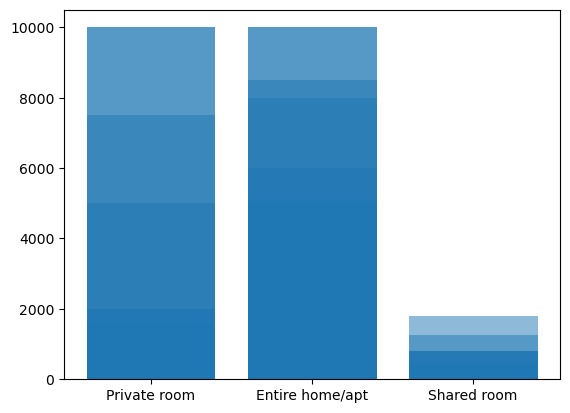

In [4]:
x_value = "room_type"
y_value = "price"
plt.bar(nyc_airbnbs_clean["room_type"], nyc_airbnbs_clean["price"], alpha=.5, align="center")

In [20]:
bins = [0, 99, 199, 299, 399, 599, 999, 1999, 2999, 9999, 20000]

# Create labels for these bins
group_labels = ["0 to 100", "100 to 200", "200 to 300", "300 to 400", "400 to 600", "600 to 1k", "1k to 2k",
                "2k to 3k", "3k to 10k", '10k +']

In [21]:
pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels).head()

0    100 to 200
1    200 to 300
3      0 to 100
4      0 to 100
5    200 to 300
Name: price, dtype: category
Categories (10, object): ['0 to 100' < '100 to 200' < '200 to 300' < '300 to 400' ... '1k to 2k' < '2k to 3k' < '3k to 10k' < '10k +']

In [22]:
nyc_airbnbs_clean["price_group"] = pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels)
nyc_airbnbs_clean.head()

/var/folders/3r/fgm41fys63zcjnbbncdplfsm0000gn/T/ipykernel_7779/3868239109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_airbnbs_clean["price_group"] = pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,100 to 200
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200 to 300
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0 to 100
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0 to 100
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,200 to 300


In [24]:
#price_cat = nyc_airbnbs_clean.sort_values(by=['room_type', 'price_group'])

price_cat = nyc_airbnbs_clean.groupby(["room_type", "price_group"]).count()

# Find how many rows fall into each bin
price_cat


id   name  host_id  host_name  \
room_type       price_group                                     
Entire home/apt 0 to 100      3087   3087     3087       3087   
                100 to 200   10837  10837    10837      10837   
                200 to 300    4052   4052     4052       4052   
                300 to 400    1201   1201     1201       1201   
                400 to 600     708    708      708        708   
                600 to 1k      313    313      313        313   
                1k to 2k        78     78       78         78   
                2k to 3k        27     27       27         27   
                3k to 10k       16     16       16         16   
                10k +            1      1        1          1   
Private room    0 to 100     14009  14009    14009      14009   
                100 to 200    3140   3140     3140       3140   
                200 to 300     289    289      289        289   
                300 to 400      99     99       99         99   
                400 to 600      54     54       54         54   
                600 to 1k       43     43       43         43   
                1k to 2k         7      7        7          7   
                2k to 3k         2      2        2          2   
                3k to 10k        3      3        3          3   
                10k +            1      1        1          1   
Shared room     0 to 100       765    765      765        765   
                100 to 200      59     59       59         59   
                200 to 300      10     10       10         10   
                300 to 400       3      3        3          3   
                400 to 600       2      2        2          2   
                600 to 1k        3      3        3          3   
                1k to 2k         2      2        2          2   
                2k to 3k         0      0        0          0   
                3k to 10k        0      0        0          0   
                10k +            0      0        0          0   

                             neighbourhood_group  neighbourhood  latitude  \
room_type       price_group                                                 
Entire home/apt 0 to 100                    3087           3087      3087   
                100 to 200                 10837          10837     10837   
                200 to 300                  4052           4052      4052   
                300 to 400                  1201           1201      1201   
                400 to 600                   708            708       708   
                600 to 1k                    313            313       313   
                1k to 2k                      78             78        78   
                2k to 3k                      27             27        27   
                3k to 10k                     16             16        16   
                10k +                          1              1         1   
Private room    0 to 100                   14009          14009     14009   
                100 to 200                  3140           3140      3140   
                200 to 300                   289            289       289   
                300 to 400                    99             99        99   
                400 to 600                    54             54        54   
                600 to 1k                     43             43        43   
                1k to 2k                       7              7         7   
                2k to 3k                       2              2         2   
                3k to 10k                      3              3         3   
                10k +                          1              1         1   
Shared room     0 to 100                     765            765       765   
                100 to 200                    59             59        59   
                200 to 300                    10             10        10   
                300 to 400

In [49]:
nyc_airbnbs_clean.loc[:, "room_type"].drop_duplicates()


0        Private room
1     Entire home/apt
39        Shared room
Name: room_type, dtype: object

In [62]:
room_price_cat = pd.pivot_table(
    price_cat, 
    values="name",
    index="room_type",
    columns="price_group" 
)

In [63]:
room_price_cat

price_group,0 to 100,100 to 200,200 to 300,300 to 400,400 to 600,600 to 1k,1k to 2k,2k to 3k,3k to 10k,10k +
room_type,,,,,,,,,,
Entire home/apt,3087,10837,4052,1201,708,313,78,27,16,1
Private room,14009,3140,289,99,54,43,7,2,3,1
Shared room,765,59,10,3,2,3,2,0,0,0


Text(0, 0.5, 'Room Price Range Count')

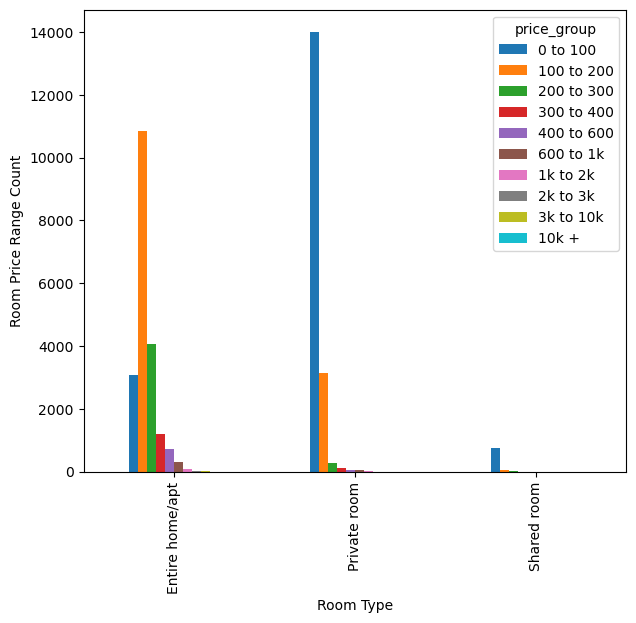

In [56]:
ax = room_price_cat.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
ax.set_xlabel("Room Type")
ax.set_ylabel("Room Price Range Count")

In [66]:
room_price_pie = pd.pivot_table(
    price_cat, 
    values="name",
    index="price_group",
    columns="room_type" 
)

room_price_pie

room_type,Entire home/apt,Private room,Shared room
price_group,,,
0 to 100,3087,14009,765
100 to 200,10837,3140,59
200 to 300,4052,289,10
300 to 400,1201,99,3
400 to 600,708,54,2
600 to 1k,313,43,3
1k to 2k,78,7,2
2k to 3k,27,2,0
3k to 10k,16,3,0


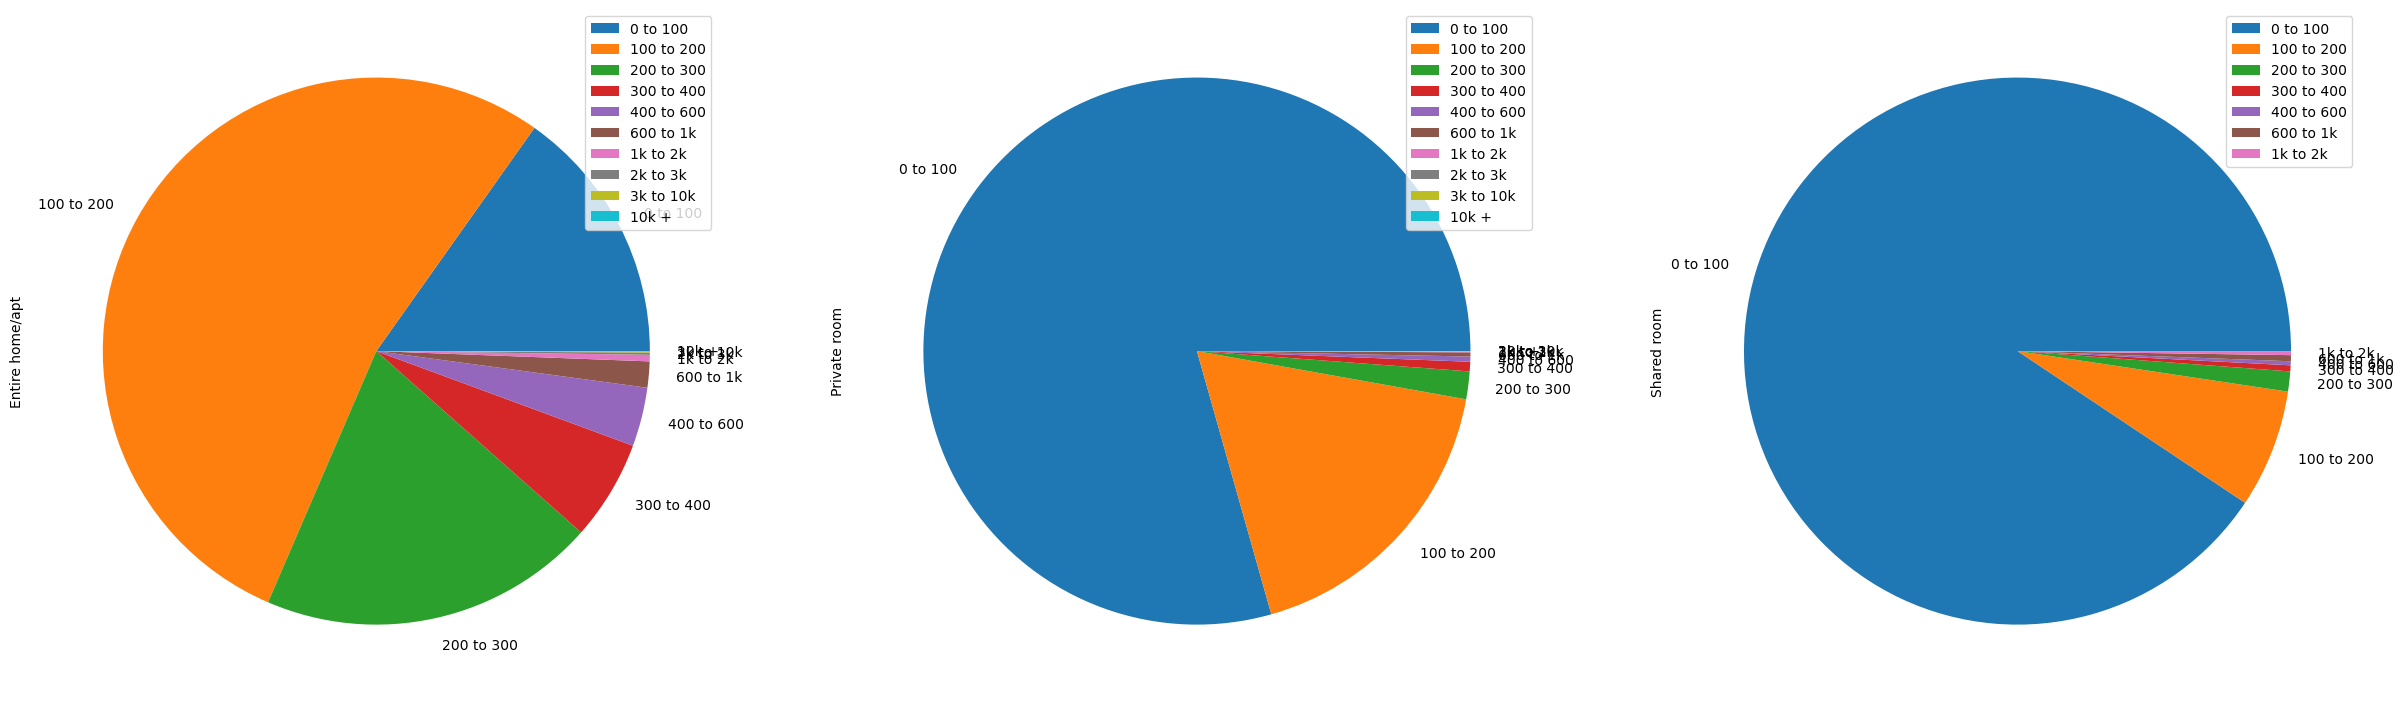

In [76]:
plot = room_price_pie.plot.pie(subplots=True, figsize=(30, 100))


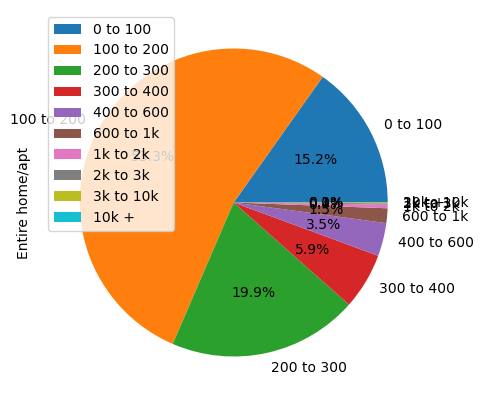

In [81]:
plot = room_price_pie.plot.pie(y='Entire home/apt', autopct='%1.1f%%', figsize=(5, 5))

# plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90)
# plt.title('World Energy Consumption')
# plt.axis('equal')
# plt.show()

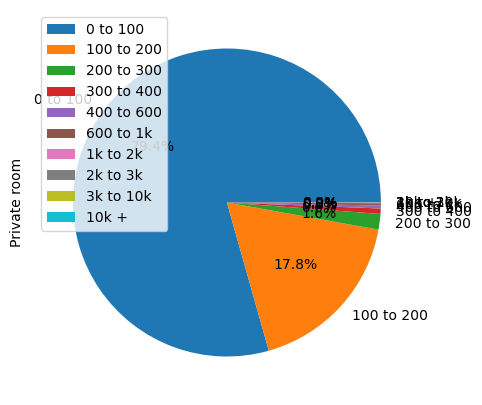

In [82]:
plot = room_price_pie.plot.pie(y='Private room', autopct='%1.1f%%', figsize=(5, 5))

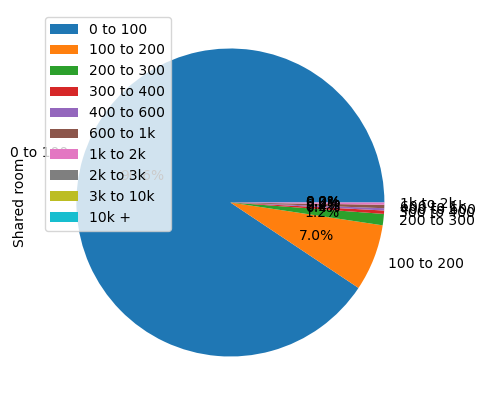

In [83]:
plot = room_price_pie.plot.pie(y='Shared room', autopct='%1.1f%%', figsize=(5, 5))